<a href="https://colab.research.google.com/github/joae1234/EDA-dengue-socioeconomico/blob/main/Projeto_ciencia_de_dadosv5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">



# **Exploratory Data Analysis (EDA)**
## <Coloque aqui o Título da Análise>

In [ ]:
#@title **Identificação do Grupo**

#@markdown Nomes completos em ordem alfabética (*\<nome\>, \<RA\>*)
Aluno1 = 'João Pedro Soares dos Santos, 21004102' #@param {type:"string"}
Aluno2 = 'Daniel Henrique, 9456177' #@param {type:"string"}
Aluno3 = 'Nathan Zanoni da Hora; 21.01208-3' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}





# **Resumo (*Abstract*)**

Este trabalho tem como objetivo analisar e comparar os dados de casos de dengue no Brasil entre os anos de 2017 e 2024. Através da integração de dados públicos de saúde com indicadores socioeconômicos, como gastos com saneamento, taxa de desemprego e pobreza, buscamos identificar possíveis padrões, correlações e fatores que possam influenciar a incidência da doença nos diferentes estados do país. A análise é feita com o auxílio de técnicas de visualização de dados e estatística descritiva, com o intuito de oferecer uma visão mais clara sobre os desafios enfrentados no combate à dengue e contribuir para a formulação de políticas públicas mais eficazes.

# **Introdução**

Faça uma breve introdução do seu trabalho. Conceitue os pontos relevantes do seu  problema e, se for o caso, das técnicas de análise empregadas. Discuta a relevância, atualidade, limitações das análises existentes e o impacto que  sua análise pode trazer.

A dengue é uma das principais doenças tropicais negligenciadas no Brasil, com milhares de casos registrados anualmente em todas as regiões do país. Transmitida pelo mosquito Aedes aegypti, a proliferação da dengue está diretamente ligada a fatores ambientais e sociais, como saneamento básico precário, altas temperaturas, chuvas intensas e desigualdade socioeconômica.

O presente trabalho propõe uma análise exploratória dos casos de dengue registrados entre 2017 e 2024, buscando relacioná-los com indicadores como despesa pública com saúde e saneamento, taxa de pobreza e taxa de desemprego. A partir do cruzamento desses dados, pretendemos identificar quais fatores apresentam maior correlação com o aumento de casos, e quais estados apresentam maior vulnerabilidade.

As análises foram realizadas utilizando a linguagem Python e bibliotecas de ciência de dados como pandas, seaborn e matplotlib. Foram aplicadas técnicas de limpeza, agrupamento, cruzamento e visualização de dados, com o objetivo de revelar padrões e auxiliar na compreensão do cenário atual da dengue no país.

Esta abordagem se destaca pela atualidade dos dados e pela tentativa de integrar diferentes dimensões (saúde e socioeconômica) em uma única análise. Apesar das limitações, como possíveis lacunas nos dados oficiais e a ausência de variáveis ambientais (como temperatura e precipitação), o trabalho oferece contribuições relevantes para o entendimento da disseminação da dengue e para a elaboração de estratégias preventivas mais eficazes.

# **Descrição e origem dos dados**

Descreva sumariamente a fonte e os dados empregados.








Para a realização deste trabalho, foram utilizados dados públicos provenientes das seguintes plataformas:

- InfoDengue: Plataforma de monitoramento de arboviroses desenvolvida pela Fiocruz, que fornece dados sobre os casos notificados de dengue no Brasil, organizados por estado e ano. Essa base foi essencial para analisar a evolução temporal da doença e sua distribuição geográfica.

- IPEAdata: Sistema de acesso a dados do Instituto de Pesquisa Econômica Aplicada (IPEA), que reúne estatísticas econômicas e sociais. A partir dessa fonte, foram obtidos indicadores como taxa de desemprego, taxa de pobreza e despesas públicas com saúde e saneamento, também organizados por estado e ano.

Os dados compreendem o período de 2017 a 2024. Para a análise, foi realizada a padronização das variáveis, limpeza das bases e junção dos dados por meio de cruzamento pelas colunas de estado e ano. Isso possibilitou a construção de uma base integrada, com a qual foi possível investigar possíveis relações entre os casos de dengue e os fatores socioeconômicos analisados.

In [ ]:
# seu código/dengue_1-1.csv

# **Aquisição e Preparação dos dados**

Faça aqui a aquisição dos dados, justificando e incluindo aqui eventuais reduções as efetuadas.

Não deixe de descrever e justificar reduções (seleções) feitas nos dados originais para os seus propósitos (por exemplo, selecionou somente dados do último ano, somente dados de países da América Latina ou selecionou somente algumas tabelas dentre várias tabelas disponíveis).








\

Como no infodengue só é possível requisitar dados para cada município, então foi decidido pegar os dados especificos dos municípios capitais já que eles são as cidades com mais populção e fluxo de pessoas de cada estado

In [ ]:
import pandas as pd
from datetime import datetime

# Dicionário com o geocode das capitais, município e estado
capitais = {
    '12': {'geocode': '1200401', 'municipio': 'Rio Branco', 'estado': 'Acre'},
    '27': {'geocode': '2704302', 'municipio': 'Maceió', 'estado': 'Alagoas'},
    '13': {'geocode': '1302603', 'municipio': 'Manaus', 'estado': 'Amazonas'},
    '16': {'geocode': '1600303', 'municipio': 'Macapá', 'estado': 'Amapá'},
    '29': {'geocode': '2927408', 'municipio': 'Salvador', 'estado': 'Bahia'},
    '23': {'geocode': '2304400', 'municipio': 'Fortaleza', 'estado': 'Ceará'},
    '53': {'geocode': '5300108', 'municipio': 'Brasília', 'estado': 'Distrito Federal'},
    '32': {'geocode': '3205309', 'municipio': 'Vitória', 'estado': 'Espírito Santo'},
    '52': {'geocode': '5208707', 'municipio': 'Goiânia', 'estado': 'Goiás'},
    '21': {'geocode': '2105302', 'municipio': 'São Luís', 'estado': 'Maranhão'},
    '31': {'geocode': '3106200', 'municipio': 'Belo Horizonte', 'estado': 'Minas Gerais'},
    '50': {'geocode': '5002704', 'municipio': 'Campo Grande', 'estado': 'Mato Grosso do Sul'},
    '51': {'geocode': '5103403', 'municipio': 'Cuiabá', 'estado': 'Mato Grosso'},
    '15': {'geocode': '1501402', 'municipio': 'Belém', 'estado': 'Pará'},
    '25': {'geocode': '2507507', 'municipio': 'João Pessoa', 'estado': 'Paraíba'},
    '26': {'geocode': '2611606', 'municipio': 'Recife', 'estado': 'Pernambuco'},
    '22': {'geocode': '2207701', 'municipio': 'Teresina', 'estado': 'Piauí'},
    '41': {'geocode': '4106902', 'municipio': 'Curitiba', 'estado': 'Paraná'},
    '33': {'geocode': '3304557', 'municipio': 'Rio de Janeiro', 'estado': 'Rio de Janeiro'},
    '24': {'geocode': '2408102', 'municipio': 'Natal', 'estado': 'Rio Grande do Norte'},
    '43': {'geocode': '4314902', 'municipio': 'Porto Alegre', 'estado': 'Rio Grande do Sul'},
    '11': {'geocode': '1100205', 'municipio': 'Porto Velho', 'estado': 'Rondônia'},
    '14': {'geocode': '1400100', 'municipio': 'Boa Vista', 'estado': 'Roraima'},
    '42': {'geocode': '4205407', 'municipio': 'Florianópolis', 'estado': 'Santa Catarina'},
    '28': {'geocode': '2800308', 'municipio': 'Aracaju', 'estado': 'Sergipe'},
    '35': {'geocode': '3550308', 'municipio': 'São Paulo', 'estado': 'São Paulo'},
    '17': {'geocode': '1721000', 'municipio': 'Palmas', 'estado': 'Tocantins'},
}

# Parâmetros fixos
disease = 'dengue'
data_format = 'json'
ew_start = 1
ew_end = 53
ey_start = 2017
ey_end = 2024

# URL base da API
url_base = 'https://info.dengue.mat.br/api/alertcity'

# Lista para armazenar DataFrames
dfs = []

# Loop pelas capitais
for uf, info in capitais.items():
    geocode = info['geocode']
    municipio = info['municipio']
    estado = info['estado']

    params = {
        'geocode': geocode,
        'disease': disease,
        'format': data_format,
        'ew_start': ew_start,
        'ew_end': ew_end,
        'ey_start': ey_start,
        'ey_end': ey_end
    }

    url = f"{url_base}?{'&'.join(f'{k}={v}' for k, v in params.items())}"
    try:
        df = pd.read_json(url)
        df['estado'] = estado
        df['municipio'] = municipio
        df['geocode'] = geocode

        # Se a coluna data_iniSE existir, converter ela para string no formato YYYY-MM-DD
        if 'data_iniSE' in df.columns:
            df['data'] = pd.to_datetime(df['data_iniSE'] / 1000, unit='s').dt.strftime('%Y-%m-%d')

        dfs.append(df)
        print(f"Dados coletados para {municipio} - {estado}")
    except Exception as e:
        print(f"Erro ao coletar dados de {municipio} - {estado}: {e}")

# Juntar todos os dados em um único DataFrame
df_dengue = pd.concat(dfs, ignore_index=True)

# Visualizar as primeiras linhas
print(df_dengue.head())

# Salvar o DataFrame em um arquivo CSV
nome_arquivo = 'dengue_capitais_2017_2024.csv'
df_dengue.to_csv(nome_arquivo, index=False, encoding='utf-8-sig')
print(f"\nArquivo CSV salvo como '{nome_arquivo}'!")


Dados coletados para Rio Branco - Acre
Dados coletados para Maceió - Alagoas
Dados coletados para Manaus - Amazonas
Dados coletados para Macapá - Amapá
Dados coletados para Salvador - Bahia
Dados coletados para Fortaleza - Ceará
Dados coletados para Brasília - Distrito Federal
Dados coletados para Vitória - Espírito Santo
Dados coletados para Goiânia - Goiás
Dados coletados para São Luís - Maranhão
Dados coletados para Belo Horizonte - Minas Gerais
Dados coletados para Campo Grande - Mato Grosso do Sul
Dados coletados para Cuiabá - Mato Grosso
Dados coletados para Belém - Pará
Dados coletados para João Pessoa - Paraíba
Dados coletados para Recife - Pernambuco
Dados coletados para Teresina - Piauí
Dados coletados para Curitiba - Paraná
Dados coletados para Rio de Janeiro - Rio de Janeiro
Dados coletados para Natal - Rio Grande do Norte
Dados coletados para Porto Alegre - Rio Grande do Sul
Dados coletados para Porto Velho - Rondônia
Dados coletados para Boa Vista - Roraima
Dados coletado

# Teste dengue

In [ ]:
# prompt: de  o total de linhas em dftotal

print(f"O total de linhas em dftotal é: {len(df_total)}")


O total de linhas em dftotal é: 10842


In [ ]:
df_dengue.head(
)

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,estado,municipio,geocode,data
0,1.734826e+12,202452.0,519.0,519.0,519.0,519.0,0.999999,142.438416,0.0,4.0,...,90.0,NaN,NaN,NaN,NaN,52714.0,Acre,Rio Branco,1200401,2024-12-22
1,1.734221e+12,202451.0,498.0,498.0,498.0,498.0,1.000000,136.675003,0.0,4.0,...,76.0,NaN,NaN,NaN,NaN,52714.0,Acre,Rio Branco,1200401,2024-12-15
2,1.733616e+12,202450.0,354.0,354.0,354.0,354.0,1.000000,97.154526,0.0,4.0,...,73.0,NaN,NaN,NaN,NaN,52714.0,Acre,Rio Branco,1200401,2024-12-08
3,1.733011e+12,202449.0,318.0,318.0,318.0,318.0,1.000000,87.274406,0.0,3.0,...,63.0,NaN,NaN,NaN,NaN,52714.0,Acre,Rio Branco,1200401,2024-12-01
4,1.732406e+12,202448.0,177.0,177.0,177.0,177.0,0.996834,48.577263,0.0,2.0,...,38.0,NaN,NaN,NaN,NaN,52714.0,Acre,Rio Branco,1200401,2024-11-24


In [ ]:
df_dengue.tail()

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,estado,municipio,geocode,data
10837,1.485648e+12,201705.0,154.0,154.0,154.0,154.0,0.999943,50.278164,0.0,2.0,...,154.0,NaN,NaN,NaN,NaN,72294.0,Tocantins,Palmas,1721000,2017-01-29
10838,1.485043e+12,201704.0,117.0,117.0,117.0,117.0,0.987861,38.198345,0.0,2.0,...,117.0,NaN,NaN,NaN,NaN,72294.0,Tocantins,Palmas,1721000,2017-01-22
10839,1.484438e+12,201703.0,86.0,86.0,86.0,86.0,0.143289,28.077415,0.0,2.0,...,86.0,NaN,NaN,NaN,NaN,72294.0,Tocantins,Palmas,1721000,2017-01-15
10840,1.483834e+12,201702.0,74.0,74.0,74.0,74.0,0.005476,24.159636,0.0,2.0,...,74.0,NaN,NaN,NaN,NaN,72294.0,Tocantins,Palmas,1721000,2017-01-08
10841,1.483229e+12,201701.0,74.0,74.0,74.0,74.0,0.517206,24.159636,0.0,2.0,...,74.0,NaN,NaN,NaN,NaN,72294.0,Tocantins,Palmas,1721000,2017-01-01


In [ ]:
df_dengue.columns

Index(['data_iniSE', 'SE', 'casos_est', 'casos_est_min', 'casos_est_max',
       'casos', 'p_rt1', 'p_inc100k', 'Localidade_id', 'nivel', 'id',
       'versao_modelo', 'tweet', 'Rt', 'pop', 'tempmin', 'umidmax',
       'receptivo', 'transmissao', 'nivel_inc', 'umidmed', 'umidmin',
       'tempmed', 'tempmax', 'casprov', 'casprov_est', 'casprov_est_min',
       'casprov_est_max', 'casconf', 'notif_accum_year', 'estado', 'municipio',
       'geocode', 'data'],
      dtype='object')

# **As colunas significam:**

  **🕒 Informações Temporais**

- data_iniSE: Data de início da Semana Epidemiológica (SE).

- SE: Semana Epidemiológica do ano.

- data: Data de referência do dado (pode ser igual ou próxima a data_iniSE).


  **🦟 Casos de Dengue**

- casos: Casos notificados de dengue na semana na localidade.

- casos_est: Estimativa modelada do número de casos de dengue.

- casos_est_min: Limite inferior da estimativa (intervalo de confiança).

- casos_est_max: Limite superior da estimativa.

- casprov: Casos prováveis (suspeitos).

- casprov_est: Estimativa de casos prováveis.

- casprov_est_min / casprov_est_max: Intervalo de confiança da estimativa de casos prováveis.

- casconf: Casos confirmados.

- notif_accum_year: Número acumulado de casos notificados no ano corrente.



  **📊 Modelagem e Risco**
- p_rt1: Probabilidade de que o Rt (taxa de reprodução) seja maior que 1 — ou seja, indica se há potencial de expansão da epidemia.

- Rt: Número reprodutivo efetivo (quanto cada pessoa infectada transmite para outras). Rt > 1 indica expansão da doença.

- p_inc100k: Probabilidade de incidência maior que 100 casos por 100 mil habitantes.

- nivel: Nível de alerta do município (ex.: verde, amarelo, laranja, vermelho).

- nivel_inc: Nível de incidência (faixa categórica da taxa de incidência).

- tweet: Pode indicar número de menções de dengue no Twitter (eventualmente usado para validação social).

- versao_modelo: Versão do modelo estatístico usado nas estimativas.


  **🌡️ Condições Climáticas**

- tempmin / tempmed / tempmax: Temperatura mínima, média e máxima da semana.

- umidmin / umidmed / umidmax: Umidade relativa mínima, média e máxima.

- receptivo: Se a localidade é receptiva à transmissão de dengue (baseado em clima e presença do vetor).

- transmissao: Indicação se há transmissão ativa da doença.


  **🌍 Informações Geográficas**

- estado: Nome do estado.

- municipio: Nome do município.

- geocode: Código IBGE do município.

- Localidade_id / id: Identificadores internos da localidade

# **Para os Dados Socioeconomicos**
Para os dados socioeconomicos de cada região, foi decidido pegar várias tabelas do site [Ipeadata](http://www.ipeadata.gov.br/Default.aspx) , e em seguida as tabelas foram tratadas e então unificadas em um único csv, foram coletados s seguintes dados:
- Taxa de desemprego
- Demissões anuais
- Admissões anuais
- Auxiliares e técnicos de saúde por 10.000 habitantes
- Despesa por função - saúde e saneamento - empenhada - estadual
- IVS - subíndice de Renda e Trabalho
- Taxa de pobreza nacional
- População

In [ ]:
pip install sidrapy


In [ ]:
# Instalar bibliotecas necessárias
!pip install pandas requests


Abaixo ocorre o tratamento da tabela da taxa de desemprego pois esse csv mostra a taxa de desempredo de cada trimestre de cada ano, então foi decido para o tratamento dos dados criar ums csv novo mantendo as taxas de desempredo no final de cada ano

In [ ]:
import pandas as pd

# URL do CSV no GitHub
url = 'https://raw.githubusercontent.com/joae1234/EDA-dengue-socioeconomico/refs/heads/main/ipeadata%5B02-05-2025-01-07%5D%20taxa%20de%20desemprego.csv'

# Ler o arquivo CSV mantendo a primeira linha como tópico
import requests
from io import StringIO

response = requests.get(url)
response.encoding = 'utf-8'
conteudo = response.text

# Separar a primeira linha (tópico) e ler o restante como DataFrame
topico, dados_csv = conteudo.split('\n', 1)
df = pd.read_csv(StringIO(dados_csv), sep=';', decimal=',')

# Verificar estrutura do arquivo
print("Tópico:", topico)
print("\nPrimeiras linhas dos dados:")
print(df.head())

# Limpar espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Identificar colunas de dados trimestrais (formato YYYY TQ)
colunas_dados = [col for col in df.columns if 'T' in col and col.split('T')[0].strip().isdigit()]

# Dicionário para armazenar o último trimestre de cada ano
ultimo_trimestre = {}

# Processar cada coluna para identificar o último trimestre
for col in colunas_dados:
    ano, trimestre = col.split('T')
    ano = ano.strip()
    trimestre = trimestre.strip()

    if ano in ultimo_trimestre:
        if int(trimestre) > int(ultimo_trimestre[ano][1]):
            ultimo_trimestre[ano] = (col, trimestre)
    else:
        ultimo_trimestre[ano] = (col, trimestre)

# Selecionar apenas as colunas do último trimestre de cada ano
colunas_manter = ['Sigla', 'Código', 'Estado'] + [v[0] for v in ultimo_trimestre.values()]
df_final = df[colunas_manter].copy()

# Renomear colunas para manter apenas o ano
df_final.columns = ['Sigla', 'Código', 'Estado'] + [col.split('T')[0].strip() for col in df_final.columns[3:]]

# Ordenar colunas por ano
colunas_ordenadas = ['Sigla', 'Código', 'Estado'] + sorted(
    [col for col in df_final.columns if col.isdigit()],
    key=lambda x: int(x)
)
df_final = df_final[colunas_ordenadas]

# Salvar mantendo o tópico na primeira linha
arquivo_saida = 'taxa_desemprego_ultimo_trimestre.csv'
with open(arquivo_saida, 'w', encoding='utf-8-sig') as f:
    f.write(topico + '\n')  # Escreve o tópico original
    df_final.to_csv(f, index=False, sep=';', decimal=',')

print(f"\n✅ Arquivo salvo como: {arquivo_saida}")
print("Estrutura do arquivo gerado:")
print(topico)
print(df_final.head())


Tópico: ﻿Taxa de desemprego - sem instrução ou equivalente (IBGE/Pnad Contínua)

Primeiras linhas dos dados:
  Sigla  Código    Estado  2017 T1  2017 T2  2017 T3  2017 T4  2018 T1  \
0    AC      12      Acre      7.8      7.0      7.0      6.9      5.4   
1    AL      27   Alagoas     12.1     15.4     10.5     10.1     13.4   
2    AM      13  Amazonas      5.4      3.1      5.4      3.3      2.1   
3    AP      16     Amapá      4.0     17.6      7.7     14.0     12.5   
4    BA      29     Bahia     13.5     13.3     11.6     12.8     16.0   

   2018 T2  2018 T3  ...  2022 T4  2023 T1  2023 T2  2023 T3  2023 T4  \
0      7.6      4.5  ...      9.9      5.8      5.7      4.8      3.8   
1     10.2     14.0  ...      6.0      5.9      5.8      7.1      9.4   
2      6.5      4.9  ...      2.9      1.0      3.6      3.4      4.3   
3     14.3     11.2  ...     11.9      9.8      5.5      6.9      7.8   
4     10.9     13.7  ...      7.9      6.9      9.2      8.7      7.0   

   2024

No caso da tabela da demissões, mostra os valores para os meses de cada anos, ntão foi gerado um csv novo pcom os valores totais de cada ano

In [ ]:
import pandas as pd
import requests
from io import StringIO

# URL do arquivo CSV
url = 'https://raw.githubusercontent.com/joae1234/EDA-dengue-socioeconomico/refs/heads/main/ipeadata%5B02-05-2025-12-43%5D%20demissoes.csv'  # Substitua pelo URL real

# Baixar o conteúdo do arquivo
response = requests.get(url)
response.encoding = 'utf-8'  # Definir a codificação correta

# Ler o arquivo CSV mantendo a primeira linha como tópico
with StringIO(response.text) as f:
    topico = f.readline().strip()  # Lê a primeira linha (tópico)
    df = pd.read_csv(f, sep=';', decimal=',')  # Lê o resto como DataFrame

# Verificar estrutura do arquivo
print("Tópico:", topico)
print("\nPrimeiras linhas dos dados:")
print(df.head())

# Limpar espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Identificar colunas de dados (formato YYYY.MM)
colunas_dados = [col for col in df.columns if '.' in col and col.split('.')[0].isdigit()]

# Processar os dados mensais para totais anuais
df_mensal = df.melt(id_vars=['Sigla', 'Código', 'Estado'],
                   value_vars=colunas_dados,
                   var_name='Periodo',
                   value_name='Demissoes')

# Extrair ano e converter valores
df_mensal['Ano'] = df_mensal['Periodo'].str.split('.').str[0]
df_mensal['Demissoes'] = pd.to_numeric(
    df_mensal['Demissoes'].astype(str).str.replace('.', '').str.replace(',', '.'),
    errors='coerce'
)

# Calcular totais anuais
df_anual = df_mensal.groupby(['Sigla', 'Código', 'Estado', 'Ano'])['Demissoes'].sum().reset_index()

# Pivotar para formato wide
df_final = df_anual.pivot(index=['Sigla', 'Código', 'Estado'],
                         columns='Ano',
                         values='Demissoes').reset_index()

# Ordenar colunas
anos_ordenados = sorted([col for col in df_final.columns if col.isdigit()], key=int)
df_final = df_final[['Sigla', 'Código', 'Estado'] + anos_ordenados]

# Salvar mantendo o tópico na primeira linha
with open('demissoes_anuais.csv', 'w', encoding='utf-8-sig') as f:
    f.write(topico + '\n')  # Escreve o tópico original
    df_final.to_csv(f, index=False, sep=';', decimal=',')

print("\nArquivo salvo como 'demissoes_anuais.csv'")
print("Estrutura do arquivo gerado:")
print(topico)
print(df_final.head())

Tópico: ﻿Empregados - demissões - Novo Caged sem ajuste

Primeiras linhas dos dados:
  Sigla  Código    Estado  2020.01  2020.02  2020.03  2020.04  2020.05  \
0    AC      12      Acre     2179     1802     2238     1805     1405   
1    AL      27   Alagoas    12236    16654    12578     9855     7371   
2    AM      13  Amazonas    11943    10607    13602    14292    10346   
3    AP      16     Amapá     1831     1562     1613     1341     1007   
4    BA      29     Bahia    45832    41478    57354    55652    41697   

   2020.06  2020.07  ...  2024.06  2024.07  2024.08  2024.09  2024.10  \
0     1423     1521  ...     3499     4206     4140     3687     4509   
1     4697     5483  ...    11915    13679    15274    13548    14399   
2     8126     9223  ...    18808    21298    21922    21809    23621   
3      998     1601  ...     3107     3681     3272     3250     3689   
4    32099    31638  ...    68293    74209    73629    68480    82789   

   2024.11  2024.12  2025.01  2

O mesmo da tabela de demissão foi aplicado na tabela de admissoes

In [ ]:
import pandas as pd
import requests
from io import StringIO

# URL do arquivo CSV
url = 'https://raw.githubusercontent.com/joae1234/EDA-dengue-socioeconomico/refs/heads/main/ipeadata%5B02-05-2025-12-37%5D%20admissoes.csv'  # Substitua pelo URL real

# Baixar o conteúdo do arquivo
response = requests.get(url)
response.encoding = 'utf-8'  # Definir a codificação correta

# Ler o arquivo CSV mantendo a primeira linha como tópico
with StringIO(response.text) as f:
    topico = f.readline().strip()  # Lê a primeira linha (tópico)
    df = pd.read_csv(f, sep=';', decimal=',')  # Lê o resto como DataFrame

# Verificar estrutura do arquivo
print("Tópico:", topico)
print("\nPrimeiras linhas dos dados:")
print(df.head())

# Limpar espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Identificar colunas de dados (formato YYYY.MM)
colunas_dados = [col for col in df.columns if '.' in col and col.split('.')[0].isdigit()]

# Processar os dados mensais para totais anuais
df_mensal = df.melt(id_vars=['Sigla', 'Código', 'Estado'],
                   value_vars=colunas_dados,
                   var_name='Periodo',
                   value_name='Admissoes')

# Extrair ano e converter valores
df_mensal['Ano'] = df_mensal['Periodo'].str.split('.').str[0]
df_mensal['Admissoes'] = pd.to_numeric(
    df_mensal['Admissoes'].astype(str).str.replace('.', '').str.replace(',', '.'),
    errors='coerce'
)

# Calcular totais anuais
df_anual = df_mensal.groupby(['Sigla', 'Código', 'Estado', 'Ano'])['Admissoes'].sum().reset_index()

# Pivotar para formato wide
df_final = df_anual.pivot(index=['Sigla', 'Código', 'Estado'],
                         columns='Ano',
                         values='Admissoes').reset_index()

# Ordenar colunas
anos_ordenados = sorted([col for col in df_final.columns if col.isdigit()], key=int)
df_final = df_final[['Sigla', 'Código', 'Estado'] + anos_ordenados]

# Salvar mantendo o tópico na primeira linha
with open('admissoes_anuais.csv', 'w', encoding='utf-8-sig') as f:
    f.write(topico + '\n')  # Escreve o tópico original
    df_final.to_csv(f, index=False, sep=';', decimal=',')

print("\nArquivo salvo como 'admissoes_anuais.csv'")
print("Estrutura do arquivo gerado:")
print(topico)
print(df_final.head())

Tópico: ﻿Empregados - admissões - Novo Caged sem ajuste

Primeiras linhas dos dados:
  Sigla  Código    Estado  2020.01  2020.02  2020.03  2020.04  2020.05  \
0    AC      12      Acre     2384     2602     2311     1602     1535   
1    AL      27   Alagoas     7701     7896     6913     2760     4999   
2    AM      13  Amazonas    12681    12123    10920     5709     5500   
3    AP      16     Amapá     1721     1753     1318      536      809   
4    BA      29     Bahia    46691    47644    44432    23170    24664   

   2020.06  2020.07  ...  2024.06  2024.07  2024.08  2024.09  2024.10  \
0     1535     1804  ...     4413     4750     4492     4642     4656   
1     5560     7054  ...    14601    16625    20445    28968    17844   
2     7853    12197  ...    23844    26037    27276    24472    26221   
3     1024     1459  ...     5081     4153     4622     4206     4086   
4    29566    34820  ...    77192    83823    89778    83366    82210   

   2024.11  2024.12  2025.01  2

Aqui ocore a junção de todos os csv em um só

In [ ]:
import pandas as pd
import requests
from io import StringIO

# Configurações
base_url = "https://raw.githubusercontent.com/joae1234/EDA-dengue-socioeconomico/main/"
arquivos_locais = {
    'admissoes_anuais.csv': 'Admissoes',
    'demissoes_anuais.csv': 'Demissoes',
    'taxa_desemprego_ultimo_trimestre.csv': 'Taxa_Desemprego'
}

arquivos_github = {
    'ipeadata[02-05-2025-12-26]Despesa por função - saúde e saneamento - empenhada - estadual.csv': 'Despesa_Saude_Saneamento',
    'ipeadataIVS - subíndice de Renda e Trabalho.csv': 'IVS_Renda_Trabalho',
    'ipeadata taxa de pobreza nacional.csv': 'Taxa_Pobreza',
    'ipeadata populacao.csv': 'Populacao'
}

# Função para ler arquivos locais com cabeçalho na segunda linha
def ler_arquivo_local(nome_arquivo):
    try:
        # Ler pulando a primeira linha (tópico) e usando a segunda como cabeçalho
        df = pd.read_csv(nome_arquivo, sep=';', decimal=',', encoding='utf-8-sig', skiprows=1)
        return df
    except Exception as e:
        print(f"Erro ao ler {nome_arquivo}: {str(e)}")
        return None

# Função para ler arquivos do GitHub (cabeçalho na segunda linha)
def ler_arquivo_github(nome_arquivo):
    try:
        url = base_url + nome_arquivo.replace(' ', '%20')
        response = requests.get(url)
        response.encoding = 'utf-8'

        # Ler pulando a primeira linha (tópico)
        df = pd.read_csv(StringIO(response.text), sep=';', decimal=',', skiprows=1)
        return df
    except Exception as e:
        print(f"Erro ao processar {nome_arquivo}: {str(e)}")
        return None

# Processamento dos arquivos
dfs = {}

# Processar arquivos locais
for arquivo, variavel in arquivos_locais.items():
    print(f"\nProcessando arquivo local: {arquivo}")
    df = ler_arquivo_local(arquivo)

    if df is not None:
        df.columns = df.columns.str.strip()

        # Verificar colunas necessárias
        colunas_necessarias = ['Sigla', 'Código', 'Estado']
        if not all(col in df.columns for col in colunas_necessarias):
            print(f"Aviso: {arquivo} não contém todas as colunas necessárias {colunas_necessarias}")
            continue

        # Transformar para formato longo
        id_vars = ['Sigla', 'Código', 'Estado']
        value_vars = [col for col in df.columns if col.replace('.', '').isdigit()]

        if not value_vars:
            print(f"Aviso: Nenhuma coluna de dados encontrada em {arquivo}")
            continue

        df_long = df.melt(id_vars=id_vars,
                         value_vars=value_vars,
                         var_name='Ano',
                         value_name=variavel)

        dfs[variavel] = df_long

# Processar arquivos do GitHub
for arquivo, variavel in arquivos_github.items():
    print(f"\nProcessando arquivo do GitHub: {arquivo}")
    df = ler_arquivo_github(arquivo)

    if df is not None:
        df.columns = df.columns.str.strip()

        # Verificar colunas necessárias
        colunas_necessarias = ['Sigla', 'Código', 'Estado']
        if not all(col in df.columns for col in colunas_necessarias):
            print(f"Aviso: {arquivo} não contém todas as colunas necessárias {colunas_necessarias}")
            continue

        # Transformar para formato longo
        id_vars = ['Sigla', 'Código', 'Estado']
        value_vars = [col for col in df.columns if col.replace('.', '').isdigit()]

        if not value_vars:
            print(f"Aviso: Nenhuma coluna de dados encontrada em {arquivo}")
            continue

        df_long = df.melt(id_vars=id_vars,
                         value_vars=value_vars,
                         var_name='Ano',
                         value_name=variavel)

        dfs[variavel] = df_long

# Consolidação dos dados
if not dfs:
    print("\nNenhum DataFrame foi carregado com sucesso. Verifique os arquivos de entrada.")
else:
    # Começar com o primeiro DataFrame disponível
    df_final = dfs[next(iter(dfs))]

    # Fazer merge com os demais DataFrames
    for variavel, df in dfs.items():
        if variavel != next(iter(dfs)):
            df_final = pd.merge(df_final, df,
                              on=['Sigla', 'Código', 'Estado', 'Ano'],
                              how='outer')

    # Ordenação e limpeza
    colunas_ordenadas = ['Sigla', 'Código', 'Estado', 'Ano'] + sorted(
        [col for col in df_final.columns if col not in ['Sigla', 'Código', 'Estado', 'Ano']])
    df_final = df_final[colunas_ordenadas]

    df_final = df_final.sort_values(['Sigla', 'Ano'])
    df_final['Ano'] = df_final['Ano'].astype(str).str.replace('.0', '')

    # Salvar resultado
    output_file = 'dados_consolidados.csv'
    df_final.to_csv(output_file, index=False, sep=';', decimal=',', encoding='utf-8-sig')

    print("\nConsolidação concluída!")
    print(f"Arquivo salvo como: {output_file}")
    print(f"Total de registros: {len(df_final)}")
    print(f"Variáveis incluídas: {list(dfs.keys())}")

    print("\nVisualização das primeiras linhas:")
    print(df_final.head())


Processando arquivo local: admissoes_anuais.csv

Processando arquivo local: demissoes_anuais.csv

Processando arquivo local: taxa_desemprego_ultimo_trimestre.csv

Processando arquivo do GitHub: ipeadata[02-05-2025-12-26]Despesa por função - saúde e saneamento - empenhada - estadual.csv

Processando arquivo do GitHub: ipeadataIVS - subíndice de Renda e Trabalho.csv

Processando arquivo do GitHub: ipeadata taxa de pobreza nacional.csv

Processando arquivo do GitHub: ipeadata populacao.csv

Consolidação concluída!
Arquivo salvo como: dados_consolidados.csv
Total de registros: 378
Variáveis incluídas: ['Admissoes', 'Demissoes', 'Taxa_Desemprego', 'Despesa_Saude_Saneamento', 'IVS_Renda_Trabalho', 'Taxa_Pobreza', 'Populacao']

Visualização das primeiras linhas:
  Sigla  Código Estado   Ano  Admissoes  Demissoes  Despesa_Saude_Saneamento  \
0    AC      12   Acre  1991        NaN        NaN                       NaN   
1    AC      12   Acre  1996        NaN        NaN                       

In [ ]:
print(df_final.head(10))

  Sigla  Código Estado   Ano  Admissoes  Demissoes  Despesa_Saude_Saneamento  \
0    AC      12   Acre  1991        NaN        NaN                       NaN   
1    AC      12   Acre  1996        NaN        NaN                       NaN   
2    AC      12   Acre  2000        NaN        NaN                       NaN   
3    AC      12   Acre  2007        NaN        NaN                       NaN   
4    AC      12   Acre  2010        NaN        NaN                       NaN   
5    AC      12   Acre  2017        NaN        NaN              9.565704e+08   
6    AC      12   Acre  2018        NaN        NaN              1.054524e+09   
7    AC      12   Acre  2019        NaN        NaN              9.953854e+08   
8    AC      12   Acre  2020    25155.0    20691.0              1.270243e+09   
9    AC      12   Acre  2021    37950.0    29266.0              1.390193e+09   

   IVS_Renda_Trabalho  Populacao  Taxa_Desemprego  Taxa_Pobreza  
0                 NaN   417718.0              NaN    

# **Análises**

Busque orientar sua análise a perguntas que sejam feitas aos dados. Empregue de 5 a 6 perguntas relevantes, que podem estar relacionadas 1-2 temas dentro do problema escolhido. Empregue seleções, gráficos e outros recursos que julgar necessário para **comunicar** suas análises. Empregue instrumentos que dão suporte à sua análise, como correlações, gráficos, pareto, teste de hipóteses etc.

Abaixo um modelo opcional para as perguntas.

## Q1. Dengue - Quais os municípios com maior número de casos confirmados acumulados no ano?



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupa por município e soma os casos acumulados
top_municipios_dengue = df_dengue.groupby('municipio')['notif_accum_year'].max().sort_values(ascending=False).head(10)

# Gráfico de barras
top_municipios_dengue.plot(kind='bar', figsize=(10, 6), title='Top 10 Municípios com Mais Casos de Dengue Acumulados no Ano')
plt.ylabel('Casos acumulados no ano')
plt.xlabel('Município')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



NameError: name 'df_dengue' is not defined

# 2. Dengue - Há tendência de aumento ou queda de casos ao longo do tempo? (todos os municípios)

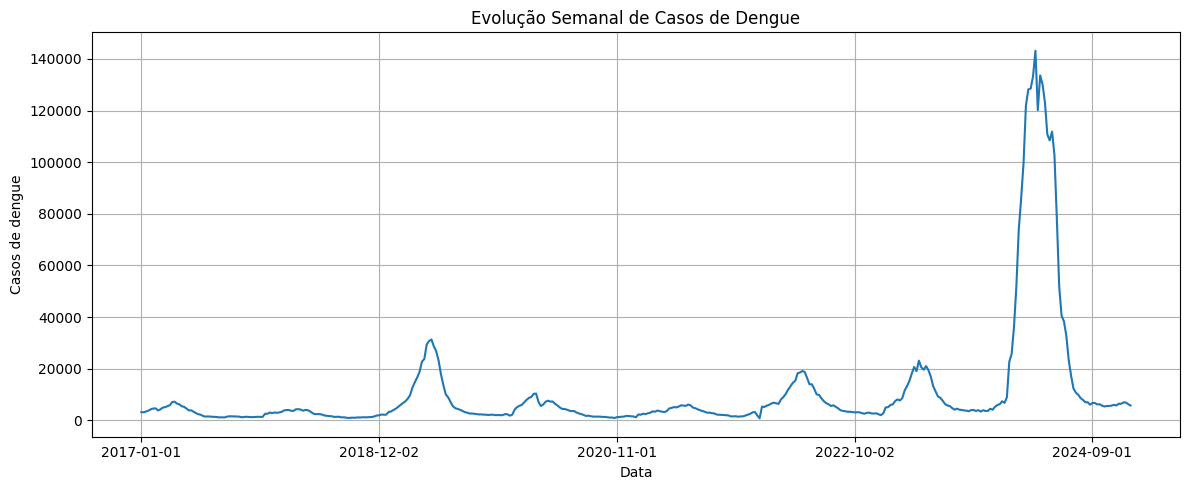

In [ ]:
# seu código
# Agrupando por data para ver evolução temporal
casos_semana = df_dengue.groupby('data')['casos'].sum()

# Gráfico de linha
casos_semana.plot(figsize=(12, 5), title='Evolução Semanal de Casos de Dengue')
plt.ylabel('Casos de dengue')
plt.xlabel('Data')
plt.grid(True)
plt.tight_layout()
plt.show()



# 3.Como evoluíram os casos de dengue no Brasil de 2017 a 2024 por estado?

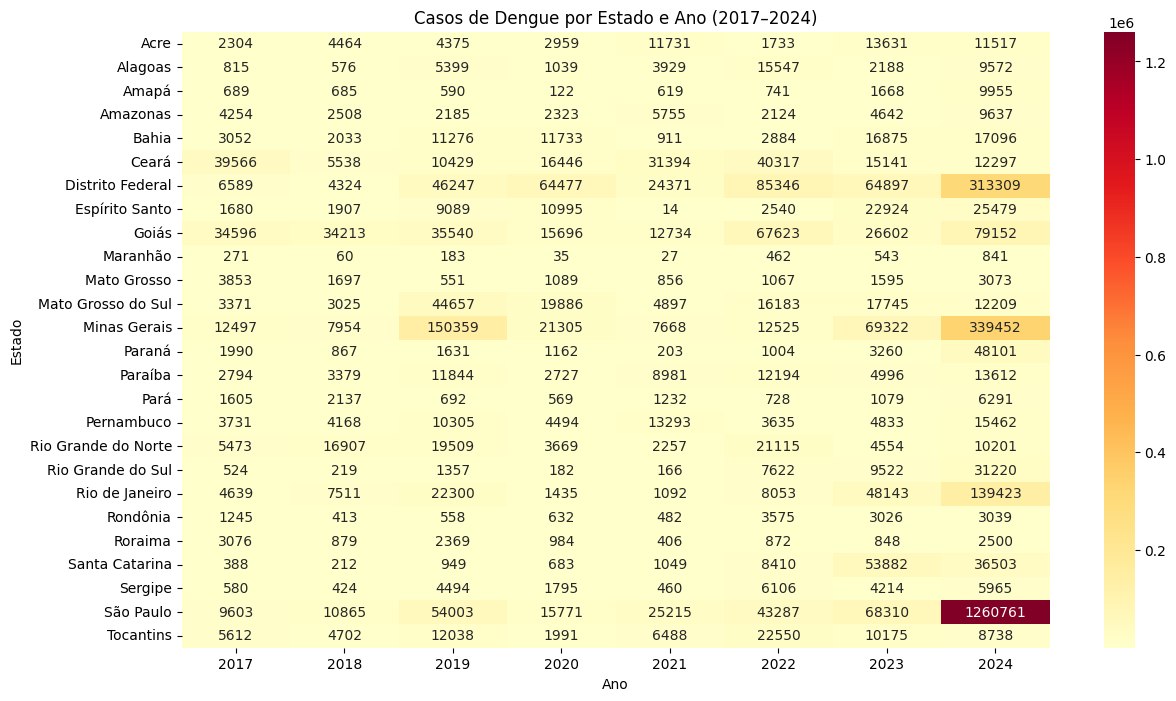

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrando o período de interesse
df_dengue['data'] = pd.to_datetime(df_dengue['data'])
df_dengue_filtered = df_dengue[df_dengue['data'].dt.year.between(2017, 2024)]

# Agrupando por estado e ano
df_dengue_filtered['Ano'] = df_dengue_filtered['data'].dt.year
casos_por_estado_ano = df_dengue_filtered.groupby(['estado', 'Ano'])['casos'].sum().reset_index()

# Pivot para heatmap
pivot = casos_por_estado_ano.pivot(index='estado', columns='Ano', values='casos')

plt.figure(figsize=(14, 8))
plt.title('Casos de Dengue por Estado e Ano (2017–2024)')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlOrRd')
plt.ylabel('Estado')
plt.xlabel('Ano')
plt.show()


# 4. Existe correlação entre gasto em saúde/saneamento e número de casos de dengue por estado?

                             casos  Despesa_Saude_Saneamento
casos                     1.000000                  0.351065
Despesa_Saude_Saneamento  0.351065                  1.000000


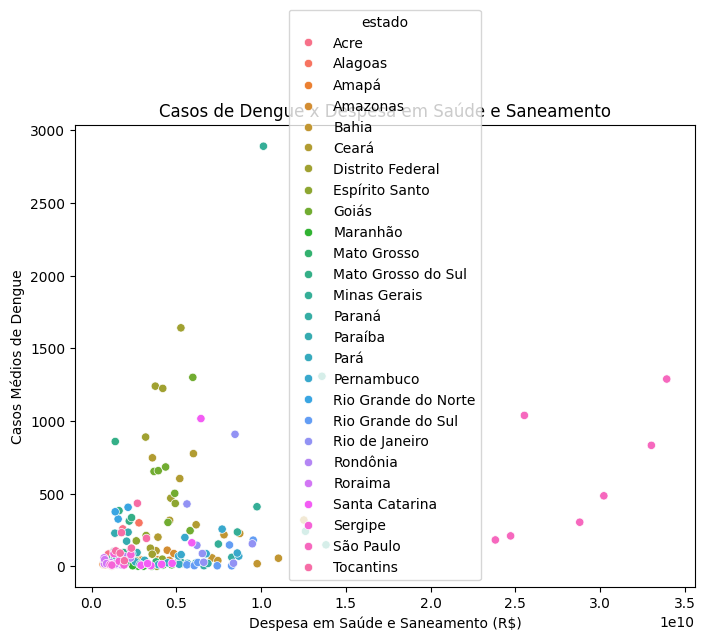

In [ ]:
# Agrupar média de casos por estado e ano
media_casos = df_dengue_filtered.groupby(['estado', 'Ano'])['casos'].mean().reset_index()

# Renomear coluna para merge
df_final.rename(columns={'Estado': 'estado'}, inplace=True)

# Garantir que as colunas 'Ano' e 'estado' estejam no mesmo tipo nas duas tabelas
media_casos['Ano'] = media_casos['Ano'].astype(int)
df_final['Ano'] = df_final['Ano'].astype(int)

# Também garantir que 'estado' esteja no mesmo formato (normalmente string)
media_casos['estado'] = media_casos['estado'].astype(str)
df_final['estado'] = df_final['estado'].astype(str)

# Realizar o merge
df_merged = pd.merge(media_casos, df_final, on=['estado', 'Ano'], how='inner')


# Calcular correlação
correlacao = df_merged[['casos', 'Despesa_Saude_Saneamento']].corr()
print(correlacao)

# Gráfico de dispersão
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_merged, x='Despesa_Saude_Saneamento', y='casos', hue='estado')
plt.title('Casos de Dengue x Despesa em Saúde e Saneamento')
plt.xlabel('Despesa em Saúde e Saneamento (R$)')
plt.ylabel('Casos Médios de Dengue')
plt.show()


# 3. Estados com maior despesa em saúde tiveram menor taxa de pobreza e menos casos de dengue? (Gráfico Pareto)

In [ ]:
print(df_merged.columns)


Index(['estado', 'Ano', 'casos', 'Sigla', 'Código', 'Admissoes', 'Demissoes',
       'Despesa_Saude_Saneamento', 'IVS_Renda_Trabalho', 'Populacao',
       'Taxa_Desemprego', 'Taxa_Pobreza'],
      dtype='object')


In [ ]:
# Somar despesas por estado
df_despesa = df_merged.groupby('Sigla')[['Despesa_Saude_Saneamento', 'Taxa_Pobreza', 'casos']].mean().reset_index()

# Ordenar por despesa
df_despesa_sorted = df_despesa.sort_values(by='Despesa_Saude_Saneamento', ascending=False)

# Gráfico Pareto
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(df_despesa_sorted['Sigla'], df_despesa_sorted['Despesa_Saude_Saneamento'], color='c', label='Despesa')
ax2 = ax1.twinx()
ax2.plot(df_despesa_sorted['Sigla'], df_despesa_sorted['casos'], color='red', marker='o', label='Casos de Dengue')
ax2.plot(df_despesa_sorted['Sigla'], df_despesa_sorted['Taxa_Pobreza'], color='orange', marker='x', label='Taxa de Pobreza')

ax1.set_ylabel('Despesa (R$)')
ax2.set_ylabel('Casos de Dengue / Taxa de Pobreza')
plt.title('Despesa em Saúde, Casos de Dengue e Pobreza por Estado')
fig.legend(loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


NameError: name 'df_merged' is not defined

# Existe correlação entre índice de renda/trabalho e a incidência de dengue?

                    IVS_Renda_Trabalho     casos
IVS_Renda_Trabalho            1.000000 -0.224285
casos                        -0.224285  1.000000


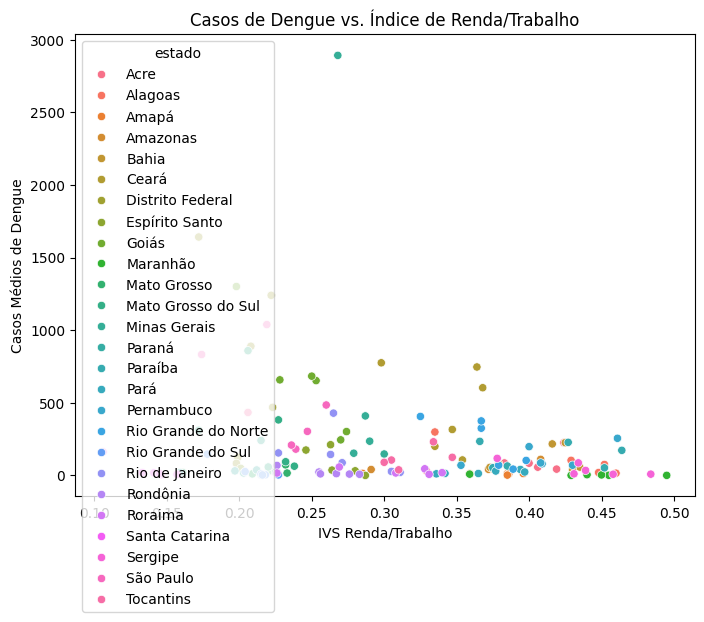

In [ ]:
# Verificar correlação
correlacao_ivstrabalho = df_merged[['IVS_Renda_Trabalho', 'casos']].corr()
print(correlacao_ivstrabalho)

# Gráfico
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_merged, x='IVS_Renda_Trabalho', y='casos', hue='estado')
plt.title('Casos de Dengue vs. Índice de Renda/Trabalho')
plt.xlabel('IVS Renda/Trabalho')
plt.ylabel('Casos Médios de Dengue')
plt.show()


# 5. Qual o impacto da taxa de desemprego na ocorrência de dengue?

                 Taxa_Desemprego     casos
Taxa_Desemprego         1.000000 -0.016454
casos                  -0.016454  1.000000


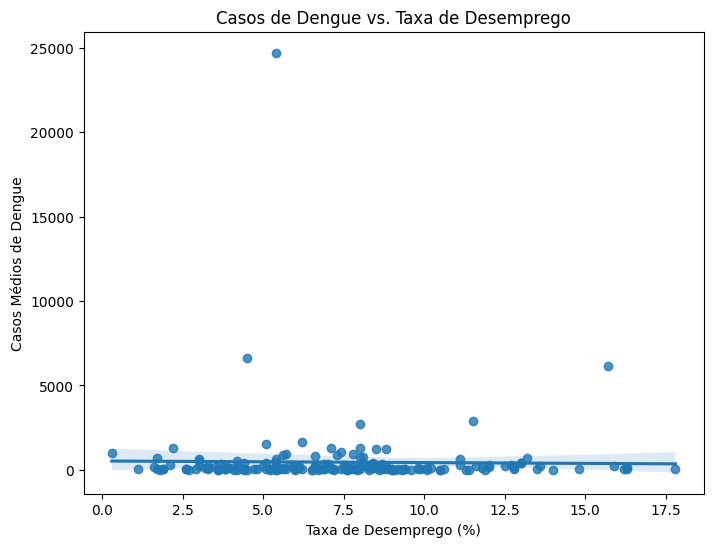

In [ ]:
correlacao_desemprego = df_merged[['Taxa_Desemprego', 'casos']].corr()
print(correlacao_desemprego)

# Gráfico
plt.figure(figsize=(8,6))
sns.regplot(data=df_merged, x='Taxa_Desemprego', y='casos')
plt.title('Casos de Dengue vs. Taxa de Desemprego')
plt.xlabel('Taxa de Desemprego (%)')
plt.ylabel('Casos Médios de Dengue')
plt.show()


# Quais estados apresentaram os maiores aumentos de casos de dengue entre 2017 e 2024?

In [ ]:
# Total por estado em 2017 e 2024
casos_2017 = df_dengue_filtered[df_dengue_filtered['Ano'] == 2017].groupby('estado')['casos'].sum()
casos_2024 = df_dengue_filtered[df_dengue_filtered['Ano'] == 2024].groupby('estado')['casos'].sum()

# Unir e calcular crescimento
df_var = pd.DataFrame({'2017': casos_2017, '2024': casos_2024})
df_var['variação_%'] = ((df_var['2024'] - df_var['2017']) / df_var['2017']) * 100

# Exibir maiores aumentos
df_var = df_var.sort_values(by='variação_%', ascending=False).dropna()
print(df_var.head(10))


                      2017       2024    variação_%
estado                                             
São Paulo           9603.0  1260761.0  13028.824326
Santa Catarina       388.0    36503.0   9307.989691
Rio Grande do Sul    524.0    31220.0   5858.015267
Distrito Federal    6589.0   313309.0   4655.031112
Rio de Janeiro      4639.0   139423.0   2905.453762
Minas Gerais       12497.0   339452.0   2616.267904
Paraná              1990.0    48101.0   2317.135678
Espírito Santo      1680.0    25479.0   1416.607143
Amapá                689.0     9955.0   1344.847605
Alagoas              815.0     9572.0   1074.478528


### **Conclusão**

A gripe viral apresenta uma correlação bastante maior que as demais doenças, com 15% acima da segunda colocada (Chikungunha). O gráfico ainda mostra uma maior incidência nos meses...

# **Referências**

Este é um item obrigatório.

# **Conclusão**

Apresente a conclusão do seu estudo. Indique limitações da tecnologia/conceitos, novos avanços e compare com tecnologias/conceitos concorrentes.



# **Apêndice: Vídeo, GitHub e Datafólio**

Publique (YouTube ou qualquer outro de acesso público) um vídeo explicativo apresentando o seu trabalho em no máximo 4min. Foque na relevância do problema e nos resultados obtidos. Salve em um GitHub público seu projeto (o notebook Python, dados, Datafólio).

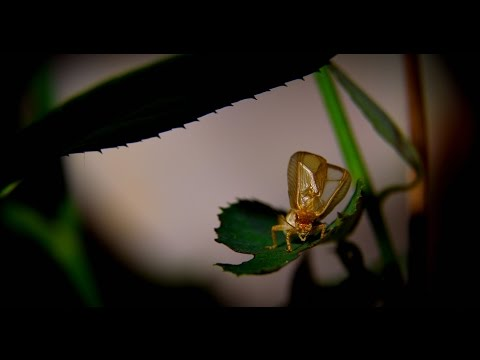

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ssSCGwy_Qfo') # substitua pelo seu vídeo

---

In [ ]:
#@markdown
#@title **Avaliação**
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas 5-6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados.
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema.
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatísticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva
Conclusao = 3 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 0 #@param {type:"slider", min:0, max:10, step:1}
Video = 0 #@param {type:"slider", min:0, max:10, step:1}





In [ ]:
#@markdown # **Nota Final**
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.9



,tia,nome,nota
0,João Pedro Soares dos Santos,21004102,7.9
1,Daniel Henrique,9456177,7.9
